In [13]:
%pip install tensorflow
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from pathlib import Path
import imghdr
import os

data_dir = "hair_types"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as tfl

image_size = (64, 64)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size, 
    labels='inferred',
    label_mode='categorical'
)

Found 981 files belonging to 3 classes.
Using 785 files for training.
Found 981 files belonging to 3 classes.
Using 196 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['Curly_Hair', 'Straight_Hair', 'Wavy_Hair']


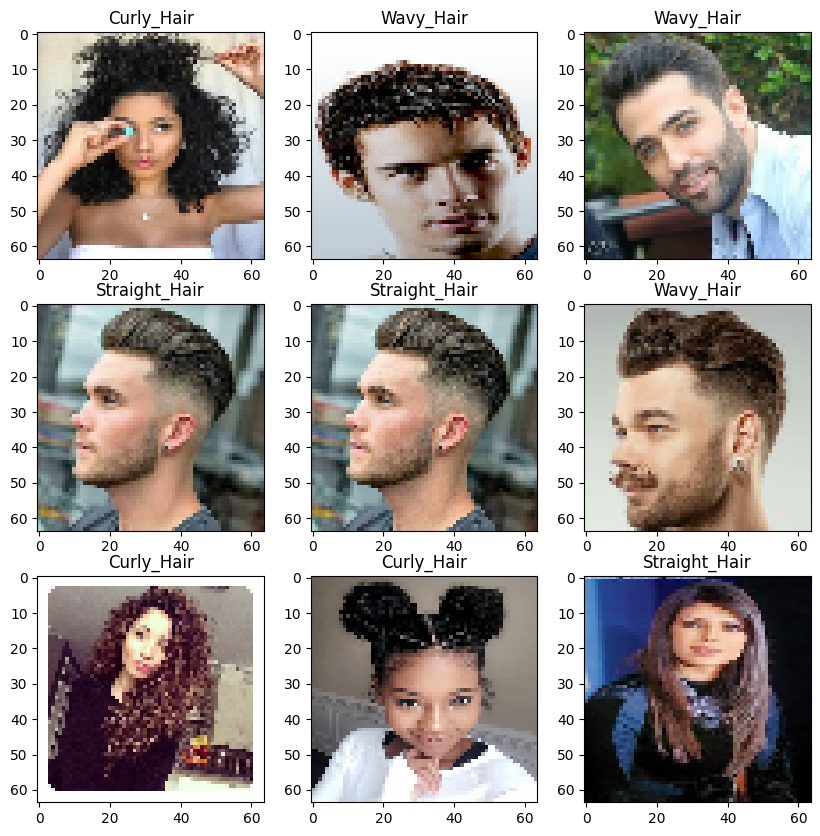

In [17]:
import matplotlib.pyplot as plt
import numpy as np

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i]).numpy()])
plt.show()

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(keras.Input(shape=image_size + (3,))) # 64, 64, 3
model.add(layers.Rescaling(1.0 / 255))
model.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))
model.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))
model.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))


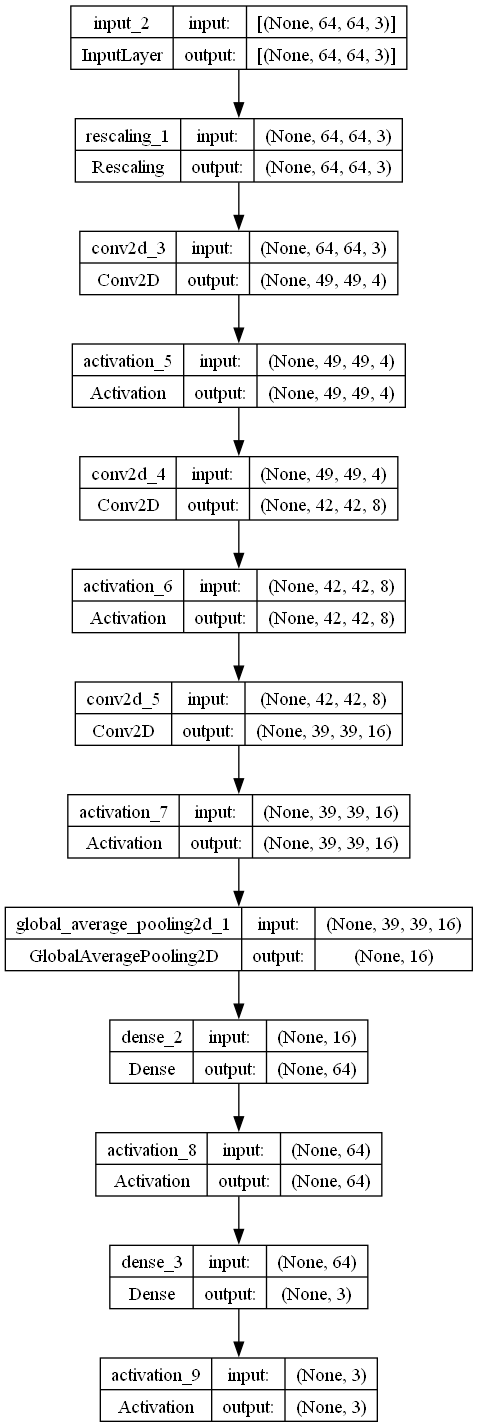

In [19]:
tf.keras.utils.plot_model(model, to_file='model_test.png', show_shapes=True)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 49, 49, 4)         3076      
                                                                 
 activation_5 (Activation)   (None, 49, 49, 4)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 42, 42, 8)         2056      
                                                                 
 activation_6 (Activation)   (None, 42, 42, 8)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 39, 39, 16)        2064      
                                                                 
 activation_7 (Activation)   (None, 39, 39, 16)       

In [21]:
epochs = 50

model.compile(
optimizer=keras.optimizers.Adam(1e-3),
loss="categorical_crossentropy",
metrics=["accuracy"],
)

model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/50


25/25 [==============================] - 4s 138ms/step - loss: 1.0991 - accuracy: 0.3490 - val_loss: 1.0986 - val_accuracy: 0.2857
Epoch 2/50
25/25 [==============================] - 4s 133ms/step - loss: 1.0824 - accuracy: 0.3516 - val_loss: 1.0856 - val_accuracy: 0.2857
Epoch 3/50
25/25 [==============================] - 4s 142ms/step - loss: 1.0571 - accuracy: 0.4127 - val_loss: 1.0653 - val_accuracy: 0.3520
Epoch 4/50
25/25 [==============================] - 4s 151ms/step - loss: 1.0437 - accuracy: 0.4446 - val_loss: 1.0666 - val_accuracy: 0.4388
Epoch 5/50
25/25 [==============================] - 4s 144ms/step - loss: 1.0377 - accuracy: 0.4586 - val_loss: 1.0486 - val_accuracy: 0.4286
Epoch 6/50
25/25 [==============================] - 4s 141ms/step - loss: 1.0218 - accuracy: 0.4713 - val_loss: 1.0419 - val_accuracy: 0.4286
Epoch 7/50
25/25 [==============================] - 4s 138ms/step - loss: 1.0414 - accuracy: 0.4420 - val_loss: 1.0618 - val_accuracy: 0.3673
Epoch 8/50
25/25 

In [22]:
img = keras.preprocessing.image.load_img(
    "hair_types/Curly_Hair/02dac897d1dec9ba8c057a11d041ada8--layered-natural-hair-natural-black-hairstyles.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create batch axis
predictions = model.predict(img_array)
print(
    "This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavyhair."
% tuple(predictions[0])
)



1/1 [==============================] - 0s 89ms/step
This image is 0.72 percent curly hair, 0.20 percent straight hair, and 0.08 percent wavyhair.


In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

In [32]:
# function to randomly flip image and rotate 
from tensorflow.keras.layers.experimental import preprocessing

def data_augmenter():
    data_augmentation = tf.keras.Sequential([])
    data_augmentation.add(preprocessing.RandomFlip('horizontal_and_vertical'))  # Flip img horizontally
    data_augmentation.add(preprocessing.RandomRotation(0.2))        # Rotate randomly
    return data_augmentation

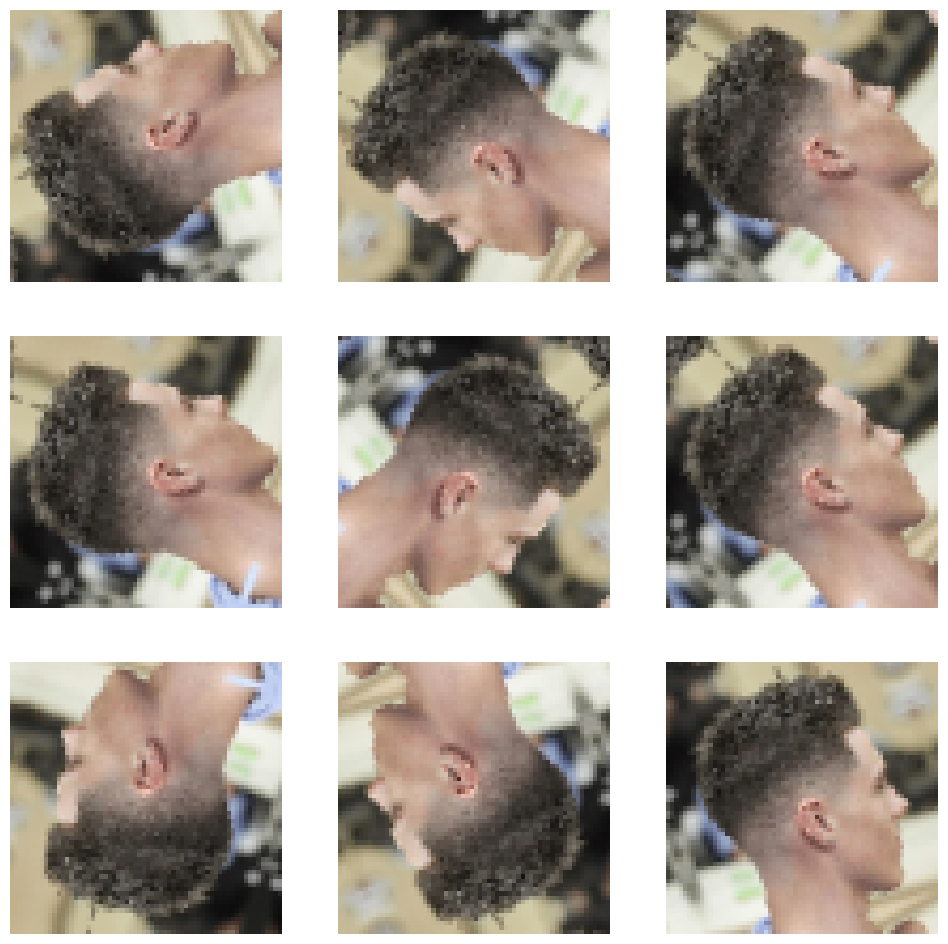

In [33]:
# for illustration, print augmented images of an input image in training data
data_augmentation = data_augmenter()

for image, _ in train_ds.take(1):
    plt.figure(figsize=(12, 12))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [34]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [45]:
# define base model to be the MobileNet for further processing with it
base_model = tf.keras.applications.MobileNetV2(input_shape=image_size + (3,),
                                                   include_top=False,
                                                   weights='imagenet')

In [46]:
def model(image_shape=image_size, data_augmentation=data_augmenter(), base_model=base_model):

    input_shape = image_shape + (3,)
    #base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
    #                                               include_top=False,
    #                                               weights='imagenet')
    base_model.trainable = False    # freeze base model by making it non trainable
    inputs = tf.keras.Input(shape=input_shape) # create input layer (Same as imageNetv2 input size)
    x = data_augmentation(inputs) # apply data augmentation to the inputs
    x = preprocess_input(x) # data preprocessing using the same weights the model was trained
    x = base_model(x, training=False) # set training to False
    x = tfl.GlobalAveragePooling2D()(x) # use global avg pooling to summarize the info in each channel
    x = tfl.Dropout(0.2)(x)  # include dropout with probability of 0.2 to avoid overfitting
    outputs = tfl.Dense(units=5, activation='softmax')(x) #use a prediction layer with 'softmax' classification
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [47]:
model = model(image_size, data_augmentation, base_model)
base_learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [48]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\Lance\AppData\Local\Temp\ipykernel_15096\1248756199.py", line 1, in <module>

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1127, in train_step

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 270, in call

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "c:\Users\Lance\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py", line 5777, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,5] and labels shape [96]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_35472]